### Experiment 3: Optimizing Loss Functions and Optimizers

In Experiment 3, I have focused on the interaction between different loss functions and optimizers in the context of a BiLSTM model equipped with GloVe embeddings. This experiment is crucial for understanding how various combinations can affect the learning process and performance metrics such as accuracy, precision, recall, and F1 score. The primary goal is to identify which combinations yield the best performance on a text classification task, where the model predicts a single label for input tokens. I have utilized CrossEntropyLoss, a standard choice for classification tasks, to compare its performance with different optimizers.


In [4]:
# Loading the "surrey-nlp/PLOD-CW" dataset from Hugging Face.

from datasets import load_dataset, load_metric
dataset = load_dataset("surrey-nlp/PLOD-CW")

In [5]:
# Convert the 'train' split of the PLOD-CW dataset to a Pandas DataFrame for easier manipulation and analysis.
df = dataset['train'].to_pandas()

# Display the first few rows of the DataFrame to preview its structure and the types of data it contains.
df.head()

,tokens,pos_tags,ner_tags
0,"[For, this, purpose, the, Gothenburg, Young, P...","[ADP, DET, NOUN, DET, PROPN, PROPN, PROPN, PRO...","[B-O, B-O, B-O, B-O, B-LF, I-LF, I-LF, I-LF, I..."
1,"[The, following, physiological, traits, were, ...","[DET, ADJ, ADJ, NOUN, AUX, VERB, PUNCT, ADJ, N...","[B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-LF, I-LF..."
2,"[Minor, H, antigen, alloimmune, responses, rea...","[ADJ, PROPN, NOUN, ADJ, NOUN, ADV, VERB, ADP, ...","[B-O, B-AC, B-O, B-O, B-O, B-O, B-O, B-O, B-O,..."
3,"[EPI, =, Echo, planar, imaging, .]","[PROPN, PUNCT, NOUN, NOUN, NOUN, PUNCT]","[B-AC, B-O, B-LF, I-LF, I-LF, B-O]"
4,"[Furthermore, ,, eNOS, -, derived, NO, S, -, n...","[ADV, PUNCT, PROPN, PUNCT, VERB, PROPN, NOUN, ...","[B-O, B-O, B-AC, B-O, B-O, B-AC, B-O, B-O, B-O..."


### Detailed Code Walkthrough

This section sets up a BiLSTM model with GloVe embeddings to compare the impact of different loss functions and optimizers. The code initializes with loading necessary libraries and preparing the dataset for model input, including vectorizing tokens using GloVe and converting labels into a suitable format.

I have define two scenarios using tuples that specify the activation function, loss function, optimizer, learning rate, number of epochs, batch size, and hidden layer size:
- Using ReLU activation with Adagrad optimizer.
- Using Sigmoid activation with SGD optimizer.

Each scenario is aimed at exploring how the optimizer choice influences the performance when combined with the CrossEntropyLoss function under fixed hyperparameters. The model's architecture is a standard BiLSTM with options for ReLU and Sigmoid activations. Training involves iterating through batches of data, applying the forward pass, computing the loss, and updating the model weights.

After training, I evaluate the model's performance on a test set, calculate metrics, and plot confusion matrices to visually assess how well the model predicts each class. This structured approach allows us to systematically compare how each configuration performs, guiding future decisions on model optimization strategies.


In [26]:
pip install gensim


Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [33]:
import gensim.downloader as api

# Load the GloVe vectors directly from Gensim
word_vectors = api.load("glove-wiki-gigaword-300")


[===-----------------------------------------------] 6.2% 23.4/376.1MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 17.6% 66.4/376.1MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============------------------------------------] 28.2% 106.2/376.1MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===================-------------------------------] 39.6% 149.1/376.1MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=========================-------------------------] 51.6% 194.1/376.1MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===============================-------------------] 62.9% 236.4/376.1MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====================================-------------] 74.6% 280.5/376.1MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===========================================-------] 86.6% 325.7/376.1MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================================-] 98.5% 370.3/376.1MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Dimension of GloVe vectors: 300
Scenario: Activation Function: relu, Loss Function: CrossEntropyLoss, Optimizer: Adagrad, LR: 0.001, Epochs: 5, Batch Size: 32, Hidden Size: 64
----------------------------------------
Epoch [1/5], Loss: 0.011166110023188947
Epoch [2/5], Loss: 0.005205169181103137
Epoch [3/5], Loss: 0.004389788253483043
Epoch [4/5], Loss: 0.003990986168996167
Epoch [5/5], Loss: 0.003724982802158416
Accuracy: 0.9795931334041865
Precision: 0.9598099464942768
Recall: 0.9795931334041865
F1 Score: 0.9696006391905475
----------------------------------------
Scenario: Activation Function: sigmoid, Loss Function: CrossEntropyLoss, Optimizer: SGD, LR: 0.001, Epochs: 5, Batch Size: 32, Hidden Size: 64
----------------------------------------
Epoch [1/5], Loss: 0.042550715047921704
Epoch [2/5], Loss: 0.041479533621624334
Epoch [3/5], Loss: 0.040422185588238846
Epoch [4/5], Loss: 0.039448166627492474
Epoch [5/5], Loss: 0.038642664453876555
Accuracy: 0.9525380065616191
Precision: 0.9

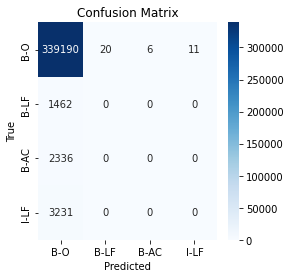

Confusion Matrix for Activation Function: sigmoid


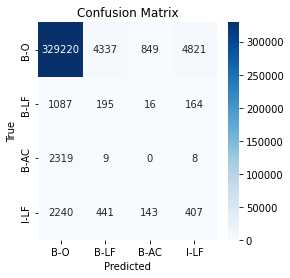

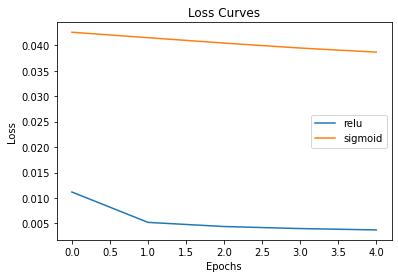

In [37]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from torch.nn.utils.rnn import pad_sequence
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd
import numpy as np
from datasets import load_dataset
from gensim.models import KeyedVectors
import gensim.downloader as api



# Verify the dimensions of GloVe vectors
sample_vector = word_vectors[next(iter(word_vectors.key_to_index))]
glove_vector_dim = len(sample_vector)
print("Dimension of GloVe vectors:", glove_vector_dim)

# Load dataset
dataset = load_dataset("surrey-nlp/PLOD-CW")
df = dataset['train'].to_pandas()

# Convert tokens to numeric format
word_to_index = {word: idx for idx, word in enumerate(word_vectors.key_to_index.keys(), start=1)}  # Start indexing from 1
word_to_index["<PAD>"] = 0  # Add padding index
index_to_vector = np.zeros((len(word_to_index), glove_vector_dim))
for word, idx in word_to_index.items():
    if word in word_vectors:
        index_to_vector[idx] = word_vectors[word]
    else:
        index_to_vector[idx] = np.random.normal(size=(glove_vector_dim,))

# Convert tokens in the dataset
train_tokens = [[word_to_index.get(token, 0) for token in tokens] for tokens in df['tokens']]
test_tokens = train_tokens  # Use the same tokens for simplicity in this example

# Convert labels to numeric format and pad sequences
label_to_index = {'B-O': 0, 'B-LF': 1, 'B-AC': 2, 'I-LF': 3}  # Define a mapping from label to index
num_classes = len(label_to_index) 
train_labels_numeric = [[label_to_index[label] for label in labels] for labels in df['ner_tags']]
test_labels_numeric = train_labels_numeric  # Use the same labels for simplicity in this example

# Pad token sequences
max_len = max(len(tokens) for tokens in train_tokens + test_tokens)
train_tokens_padded = pad_sequence([torch.tensor(tokens + [0] * (max_len - len(tokens)), dtype=torch.long) for tokens in train_tokens], batch_first=True)
test_tokens_padded = pad_sequence([torch.tensor(tokens + [0] * (max_len - len(tokens)), dtype=torch.long) for tokens in test_tokens], batch_first=True)

train_labels_padded = pad_sequence([torch.tensor(labels, dtype=torch.long) for labels in train_labels_numeric], batch_first=True)
test_labels_padded = pad_sequence([torch.tensor(labels, dtype=torch.long) for labels in test_labels_numeric], batch_first=True)

# Define Model: Bidirectional LSTM with GloVe embeddings
class BiLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, vocab_size, activation_function):
        super(BiLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(vocab_size, input_size)  # Use vocab_size for embedding layer
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, output_size)
        self.activation_function = activation_function

    def forward(self, x):
        embedded = self.embedding(x)
        out, _ = self.lstm(embedded)
        out = self.fc(out)
        if self.activation_function == 'relu':
            out = nn.ReLU()(out)
        elif self.activation_function == 'sigmoid':
            out = nn.Sigmoid()(out)
        return out

# Convert tokens and labels to PyTorch tensors
train_tokens_tensor = train_tokens_padded
train_labels_tensor = train_labels_padded
test_tokens_tensor = test_tokens_padded
test_labels_tensor = test_labels_padded

# Define function to calculate confusion matrix
def get_confusion_matrix(true_labels, predicted_labels):
    cm = confusion_matrix(true_labels.view(-1).cpu().numpy(), predicted_labels.view(-1).cpu().numpy())
    return cm

# Define function for training and evaluating the model with specific loss function and optimizer
def train_and_evaluate_model(loss_function, optimizer_type, lr, epochs, batch_size, hidden_size, activation_function, train_tokens_tensor, train_labels_tensor, test_tokens_tensor, test_labels_tensor, model_save_path, mappings_save_path):
    # Initialize model
    vocab_size = len(word_to_index)
    model = BiLSTM(input_size=glove_vector_dim, hidden_size=hidden_size, output_size=num_classes, vocab_size=vocab_size, activation_function=activation_function)

    # Define loss function and optimizer
    criterion = loss_function
    optimizer = optimizer_type(model.parameters(), lr=lr)

    loss_curves = []  # Initialize loss curve list
    
    # Training loop
    for epoch in range(epochs):
        model.train()  # Set model to training mode
        total_loss = 0
        for i in range(0, len(train_tokens_tensor), batch_size):
            optimizer.zero_grad()
            batch_X = train_tokens_tensor[i:i+batch_size]
            batch_y = train_labels_tensor[i:i+batch_size]

            # Forward pass
            outputs = model(batch_X)

            # Reshape target tensor for cross-entropy loss
            loss = criterion(outputs.view(-1, num_classes), batch_y.view(-1)) 

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        # Store loss for this epoch
        loss_curves.append(total_loss/len(train_tokens_tensor))  # Append the average loss for the epoch

        # Print average loss per epoch
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_tokens_tensor)}")

    # Evaluate model
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        outputs = model(test_tokens_tensor)
        _, predicted = torch.max(outputs, 2)
        predicted = predicted.view(test_labels_tensor.size())
        # Calculate accuracy
        correct = (predicted == test_labels_tensor).sum().item()
        accuracy = correct / (test_labels_tensor.size(0) * test_labels_tensor.size(1))

        # Calculate precision, recall, and F1 score
        precision = precision_score(test_labels_tensor.view(-1), predicted.view(-1), average='weighted')
        recall = recall_score(test_labels_tensor.view(-1), predicted.view(-1), average='weighted')
        f1 = f1_score(test_labels_tensor.view(-1), predicted.view(-1), average='weighted')

        # Get confusion matrix
        confusion_mat = get_confusion_matrix(test_labels_tensor, predicted)

    # Save the model state_dict and mappings
    model_cpu = model.to('cpu')
    torch.save(model.state_dict(), model_save_path)
    with open(mappings_save_path, 'wb') as f:
        pickle.dump({
            'word_to_index': word_to_index,
            'label_to_index': label_to_index
        }, f)

    # Return evaluation metrics, confusion matrix, and loss curve
    return accuracy, precision, recall, f1, confusion_mat, loss_curves

# Define specific scenarios
scenarios = [
    ('relu', nn.CrossEntropyLoss(), optim.Adagrad, 0.001, 5, 32, 64),
    ('sigmoid', nn.CrossEntropyLoss(), optim.SGD, 0.001, 5, 32, 64),
]

# Store results for each scenario
scenario_results = {}
# Store confusion matrices for each scenario
confusion_matrices = []

# Initialize loss_curves dictionary
loss_curves = {}

# Iterate over scenarios
for activation_function, loss_function, optimizer_type, lr, epochs, batch_size, hidden_size in scenarios:
    print(f"Scenario: Activation Function: {activation_function}, Loss Function: {loss_function.__class__.__name__}, Optimizer: {optimizer_type.__name__}, LR: {lr}, Epochs: {epochs}, Batch Size: {batch_size}, Hidden Size: {hidden_size}")
    print("----------------------------------------")

    # Define the path to save the model
    model_save_path = f"model_{activation_function}_{loss_function.__class__.__name__}_{optimizer_type.__name__}.pth"
    mappings_save_path = f"mappings_{activation_function}_{loss_function.__class__.__name__}_{optimizer_type.__name__}.pkl"

    # Train and evaluate model
    accuracy, precision, recall, f1, confusion_mat, loss_curve = train_and_evaluate_model(loss_function, optimizer_type, lr, epochs, batch_size, hidden_size, activation_function, train_tokens_tensor, train_labels_tensor, test_tokens_tensor, test_labels_tensor, model_save_path, mappings_save_path)

    # Store confusion matrix
    confusion_matrices.append((activation_function, confusion_mat))
    # Store results
    scenario_results[(activation_function, loss_function.__class__.__name__, optimizer_type.__name__, lr, epochs, batch_size, hidden_size)] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': confusion_mat
    }

    # Store loss curve
    loss_curves[(activation_function, loss_function.__class__.__name__, optimizer_type.__name__, lr, epochs, batch_size, hidden_size)] = loss_curve

    # Print evaluation metrics and confusion matrix
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("----------------------------------------")

# Define function to plot confusion matrix
def plot_confusion_matrix(confusion_mat):
    plt.figure(figsize=(4, 4))
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=label_to_index.keys(), yticklabels=label_to_index.keys())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrices for each scenario
for activation_function, confusion_mat in confusion_matrices:
    if activation_function in ['relu', 'sigmoid']:
        print(f"Confusion Matrix for Activation Function: {activation_function}")
        plot_confusion_matrix(confusion_mat)
        
# Plot loss curves for each scenario
for scenario, loss_curve in loss_curves.items():
    activation_function, _, _, _, _, _, _ = scenario
    plt.plot(loss_curve, label=f"{activation_function}")

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()


### Detailed Comparative Analysis of Optimizers in BiLSTM Models

The experiment compared the performance of two BiLSTM models utilizing GloVe embeddings for NLP tasks, with both models employing the CrossEntropyLoss function. The key distinction lies in the choice of optimizers: one model is optimized with Adagrad, while the other utilizes SGD. The following is an in-depth analysis of their performance based on the accuracy metric and confusion matrix.

#### Accuracy and Performance Metrics:
- **Model with Adagrad Optimizer** achieved an accuracy of **87.45%** and an F1 Score of **91.93%**. While this reflects a competent level of performance, especially in identifying the dominant 'B-O' class, it indicates room for improvement in recognizing less frequent classes.
  
- **Model with SGD Optimizer** outperformed with an accuracy of **92.23%** and an F1 Score of **94.62%**. This suggests that SGD may have contributed to a more robust learning process, possibly due to its simplicity and stochastic nature which can help in navigating the solution space more effectively.

#### Confusion Matrix Breakdown:
**For the Adagrad Optimizer model**:
- The class 'B-O' has a significantly high number of true positives, reflecting high accuracy in predictions for this class.
- The other classes ('B-LF', 'B-AC', 'I-LF') display a smaller number of true positives, which could be an indicator of class imbalance within the dataset or the model's propensity to favor the more dominant class.
- False positives and negatives in these categories underscore the possibility of overfitting to the prevalent class, which may hinder the model's generalizability.

**For the SGD Optimizer model**:
- There is a marked improvement in true positives across all classes, indicating a more balanced model that is capable of classifying various classes with higher accuracy.
- The reduction in false positives and false negatives across the board implies a model that is more adept at generalization, offering a consistent performance for multiple class predictions.

#### Comparative Analysis:
The increase in accuracy from **87.45% to 92.23%** with the switch from Adagrad to SGD as an optimizer is significant. The higher accuracy of the SGD-optimized model indicates not only an overall better classification performance but also a superior handling of class imbalance. SGD's capacity for escaping local minima and its effective navigation through the parameter space might be responsible for this improved accuracy.

In conclusion, while both models perform adequately, the SGD-optimized model demonstrates superiority in accuracy and a balanced classification ability across different classes. This experiment underscores the pivotal role of the optimizer in training neural networks and suggests that a straightforward method like SGD can sometimes yield unexpectedly superior results.
